In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from datetime import datetime 
from datetime import timedelta

In [2]:
#my_example="./reanalysis/_grib2netcdf-webmars-public-svc-blue-003-6fe5cac1a363ec1525f54343b6cc9fd8-DJTGFO.nc"
#my_example="./reanalysis/_grib2netcdf-webmars-public-svc-blue-006-6fe5cac1a363ec1525f54343b6cc9fd8-ZButjy.nc"
#my_example="./reanalysis/_grib2netcdf-webmars-public-svc-blue-005-6fe5cac1a363ec1525f54343b6cc9fd8-9xZRUB.nc"

my_example="output.nc"

fh = Dataset(my_example, mode='r')

In [5]:
print(fh.variables)

OrderedDict([('longitude', <class 'netCDF4._netCDF4.Variable'>
float32 longitude(longitude)
    units: degrees_east
    long_name: longitude
unlimited dimensions: 
current shape = (480,)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('latitude', <class 'netCDF4._netCDF4.Variable'>
float32 latitude(latitude)
    units: degrees_north
    long_name: latitude
unlimited dimensions: 
current shape = (241,)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('time', <class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    units: hours since 1900-01-01 00:00:00.0
    long_name: time
    calendar: gregorian
unlimited dimensions: time
current shape = (124,)
filling on, default _FillValue of -2147483647 used
), ('t', <class 'netCDF4._netCDF4.Variable'>
int16 t(time, latitude, longitude)
    scale_factor: 0.0007824473631128591
    add_offset: 248.1824090692872
    _FillValue: -32767
    missing_value: -32767
    units: K
    long_name: Temperature
    standard_name: 

In [6]:
lat = fh.variables['latitude'][:]
lon = fh.variables['longitude'][:]
time = fh.variables['time'][:]
hgt = fh.variables['z'][:] # 2 meter temperature
temp= fh.variables["t"][:]

hgt_units = fh.variables['z'].units
temp_units = fh.variables['t'].units

KeyError: 'z'

In [72]:
#FECHA####################################
fecha_init = datetime(1900,1,1,0,0,0)
print(fecha_init)

#https://stackoverflow.com/questions/9452775/converting-numpy-dtypes-to-native-python-types
hora=time[28].item() 
horas=timedelta(hours = hora)

fecha= fecha_init + horas
print(fecha)

fecha_str=datetime.strftime(fecha, '%Y%m%d_%H%MUTC')

print (fecha_str)

1900-01-01 00:00:00
1979-02-08 00:00:00
19790208_0000UTC


In [68]:
m = Basemap(projection='cyl', llcrnrlon=lon.min(), \
    urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
    resolution='c')

In [69]:
lon, lat = np.meshgrid(lon, lat)
xi, yi = m(lon, lat)

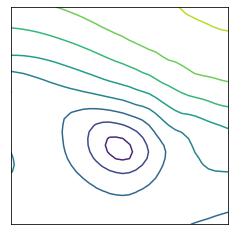

In [78]:
cs = m.contour(xi,yi,np.squeeze(hgt[35,0]))
#hgt[24,0]

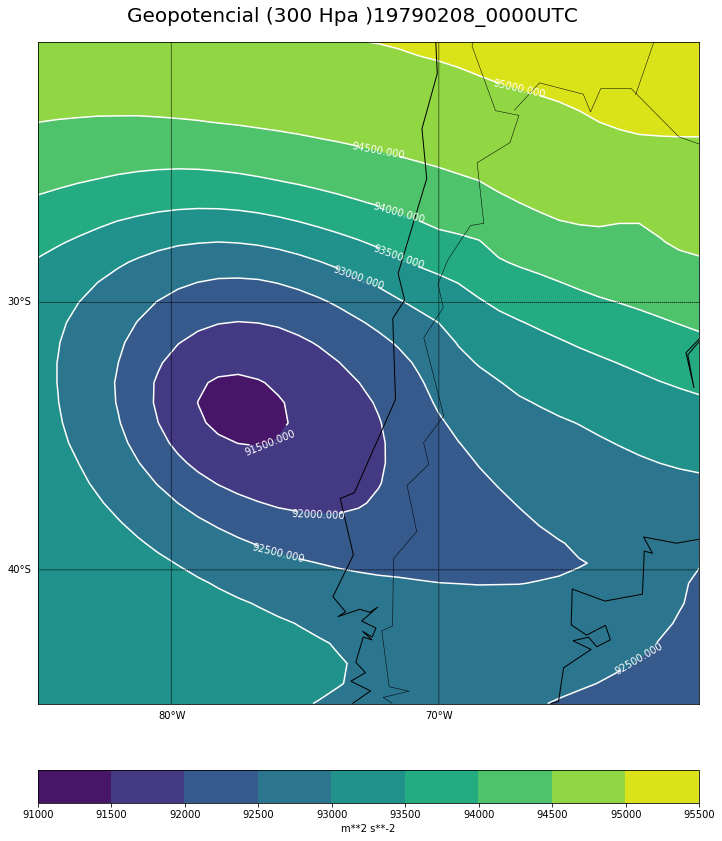

In [73]:
# Plot Data
plt.figure(figsize=(18,14))

cs = m.contour(xi,yi,np.squeeze(hgt[28,0]),colors="white")
plt.clabel(cs, inline=1, fontsize=10)
cs1 = m.contourf(xi,yi,np.squeeze(hgt[28,0]))

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
#m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs1, location='bottom', pad="10%")
cbar.set_label(hgt_units)

# Add Title
#plt.title('Geopotencial (300 Hpa )'+ fecha_str)
plt.figtext(.5,.9,'Geopotencial (300 Hpa )'+ fecha_str, fontsize=20, ha='center')
plt.show()